In [1]:
# import functions and libraries
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy import signal
from numpy import *
!sudo apt-get install libportaudio2
!pip install sounddevice
import sounddevice as sd

from IPython.display import Audio

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!pip install ffmpeg-python
# import mic_to_np_arr as mic
!wget -O mic_to_np_arr_TEMP.py https://raw.githubusercontent.com/AbrahamSteenhoek/RaspPi_DSP/main/mic_to_np_arr.py
import mic_to_np_arr_TEMP as mic

%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Mounted at /content/drive
--2021-12-09 01:55:38--  https://raw.githubusercontent.com/AbrahamSteenhoek/RaspPi_DSP/main/mic_to_np_arr.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3960 (3.9K) [text/plain]
Saving to: ‘mic_to_np_arr_TEMP.py’

mic_to_np_arr_TEMP. 100%[===================>]   3.87K  --.-KB/s    in 0s      

2021-12-09 01:55:38 (36.3 MB/s) - ‘mic_to_np_arr_TEMP.py’ saved [3960/3960]



In [65]:
def record_plot_audio():
  mic_audio, mic_sr = mic.get_audio()

  t = r_[0.0:len(mic_audio)]/mic_sr
  width, height = plt.figaspect(0.2)
  fig = plt.figure(figsize=(width,height))
  plt.plot(t, abs(mic_audio))
  plt.title('Recorded audio')
  plt.xlabel('time[s]')
  plt.show()

  mic_spectrum = np.fft.rfft(mic_audio, n=512)
  mic_spectrum_freq = np.fft.rfftfreq(mic_audio.size, d=1./mic_sr)
  mic_spectrum_abs = abs(mic_spectrum)

  # plot
  width, height = plt.figaspect(0.2)
  fig = plt.figure(figsize=(width,height))
  plt.plot(mic_spectrum_freq, abs(mic_spectrum))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Magnitude")
  plt.title("Frequency response of recorded audio")

  return mic_audio, mic_sr, mic_spectrum, mic_spectrum_freq

def record_plot_audio2():
  mic_audio, mic_sr = mic.get_audio()

  t = r_[0.0:len(mic_audio)]/mic_sr
  width, height = plt.figaspect(0.2)
  fig = plt.figure(figsize=(width,height))
  plt.plot(t, abs(mic_audio))
  plt.title('Recorded audio')
  plt.xlabel('time[s]')
  plt.show()

  w, mic_spectrum = signal.freqz(mic_audio, worN=512)
  freq = w/pi*mic_sr/2
  # plot
  width, height = plt.figaspect(0.2)
  fig = plt.figure(figsize=(width,height))
  plt.plot(freq, abs(mic_spectrum))
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("Magnitude")
  plt.title("Frequency response of recorded audio")

  return np.copy(mic_audio), mic_sr, mic_spectrum, freq

# Mic Sandbox Usage
There is a sample chirp (above) available to play. To record using your PC's built-in microphone, run the next section of code. To stop, press the recording button as instructed. The recorded audio and frequency response will be plotted.

# Saramonic mic


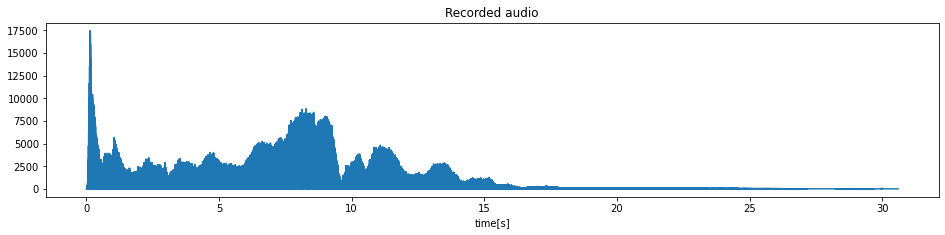

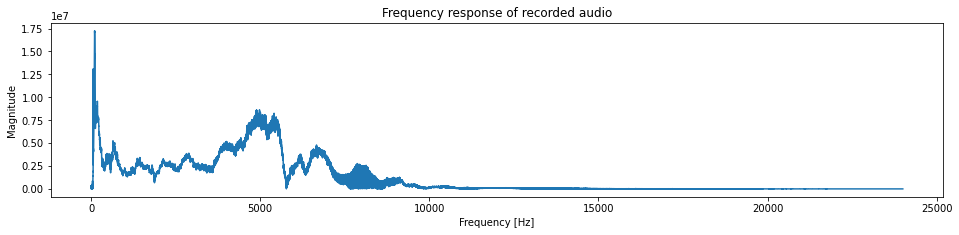

In [81]:
s_chirp, sr, Sf_chirp, freq = record_plot_audio()

Get the envelope of the signal using the Hilbert Transform

Text(0.5, 1.0, 'Envelope of the transcieved chirp')

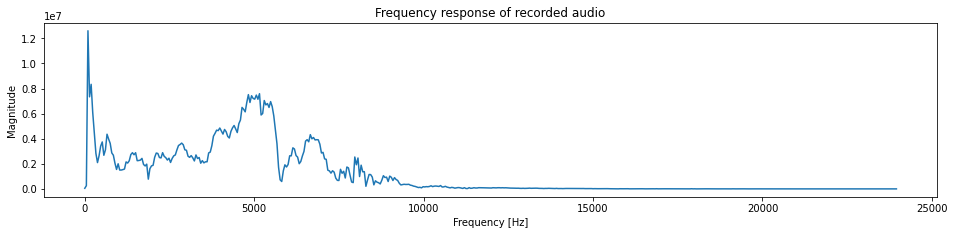

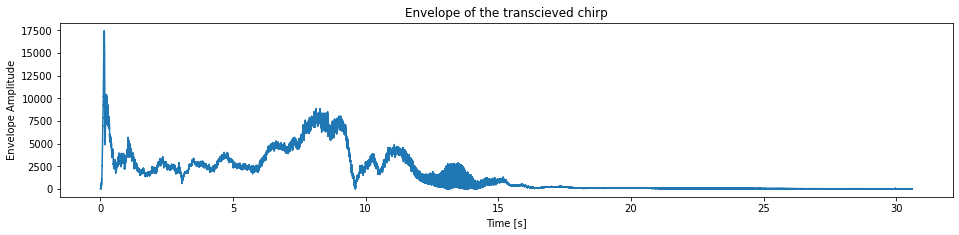

In [84]:
w, chirp_spectrum = signal.freqz(s_chirp, worN=512)
f = w/pi*sr/2
# plot
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(f, abs(chirp_spectrum))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Frequency response of recorded audio")

s_chirp_HB = signal.hilbert( s_chirp )
t = r_[0:len(s_chirp_HB)]/sr

# plot
width, height = figaspect(0.2)
fig = figure(figsize=(width,height))
plt.plot(t, abs(s_chirp_HB))
plt.xlabel("Time [s]")
plt.ylabel("Envelope Amplitude")
plt.title("Envelope of the transcieved chirp")

In [79]:
# TODO: use DCT instead of FFT since it's faster for real data

# chirp_dct = scipy.fft.dct(s_chirp)

# # plot
# width, height = plt.figaspect(0.2)
# fig = plt.figure(figsize=(width,height))
# plt.plot(abs(chirp_dct))
# plt.xlabel("Frequency [Hz]")
# plt.ylabel("Magnitude")
# plt.title("DCT of recorded audio")

# print(chirp_dct)